# **Lab 21: Quantum Networking**
---

### **Description**
In today's lab, we will review how to create entanglement and perform quantum teleportation in cirq and then apply this to a core protocol for quantum networks, entanglement swapping, that builds upon teleportation.

<br>

### **Structure**
**Part 1**: [Preparing Bell States and Quantum Teleportation](#p1)

**Part 2**: [Entanglement Swapping](#p2)


<br>

### **Resources**
* [Cirq Basics Cheat Sheet](https://docs.google.com/document/d/1j0vEwtS6fK-tD1DWAPry4tJdxEiq8fwMtXuYNGRhK_M/edit?usp=drive_link)


<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [10]:
# @title
! pip install cirq --quiet
import cirq

import matplotlib.pyplot as plt
import numpy as np

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]
plt.rcParams.update({'font.size': 8})

try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install cirq --quiet
    import cirq
    print("installed cirq.")

<a name="p1"></a>

---
## **Part 1: Preparing Bell States and Quantum Teleportation**
---
In this part, you will review working with bell states and quantum teleportation.

####**Problem #1.1**
**Together**, create a two qubit quantum circuit to create this bell state:
$$\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

Output the final state vector in ket notation.

In [ ]:
my_qubits = cirq.NamedQubit.range(2, prefix = "q")
my_circuit = cirq.Circuit()

# COMPLETE THIS CODE

my_circuit

In [ ]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))

##### **Solution**

In [2]:
my_qubits = cirq.NamedQubit.range(2, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append([cirq.H(my_qubits[0]), cirq.CNOT(my_qubits[0], my_qubits[1])])
my_circuit

q0: ───H───@───
           │
q1: ───────X───

In [3]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))

'0.71|00⟩ + 0.71|11⟩'

####**Problem #1.2**
**Independently**, create a two qubit quantum circuit to create this bell state:
$$\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$$

Output the final state vector in ket notation.

In [ ]:
my_qubits = cirq.NamedQubit.range(2, prefix = "q")
my_circuit = cirq.Circuit()

# COMPLETE THIS CODE

my_circuit

In [ ]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))

##### **Solution**

In [4]:
my_qubits = cirq.NamedQubit.range(2, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append([cirq.H(my_qubits[0]), cirq.CNOT(my_qubits[0], my_qubits[1]), cirq.Z(my_qubits[0])])
my_circuit

q0: ───H───@───Z───
           │
q1: ───────X───────

In [5]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))

'0.71|00⟩ - 0.71|11⟩'

####**Problem #1.3**
**Independently**, create a two qubit quantum circuit to create this bell state:
$$\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$$

Output the final state vector in ket notation.

In [ ]:
my_qubits = cirq.NamedQubit.range(2, prefix = "q")
my_circuit = cirq.Circuit()

# COMPLETE THIS CODE

my_circuit

In [ ]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))

##### **Solution**

In [6]:
my_qubits = cirq.NamedQubit.range(2, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append([cirq.H(my_qubits[0]), cirq.X(my_qubits[0]), cirq.CNOT(my_qubits[0], my_qubits[1])])
my_circuit

q0: ───H───X───@───
               │
q1: ───────────X───

In [7]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))

'0.71|00⟩ + 0.71|11⟩'

####**Problem #1.4**
**Independently**, create a two qubit quantum circuit to create this bell state:
$$\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$$

Output the final state vector in ket notation.

In [ ]:
my_qubits = cirq.NamedQubit.range(2, prefix = "q")
my_circuit = cirq.Circuit()

# COMPLETE THIS CODE

my_circuit

In [ ]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))

##### **Solution**

In [8]:
my_qubits = cirq.NamedQubit.range(2, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append([cirq.H(my_qubits[0]), cirq.CNOT(my_qubits[0], my_qubits[1]), cirq.Z(my_qubits[0]), cirq.X(my_qubits[0])])
my_circuit

q0: ───H───@───Z───X───
           │
q1: ───────X───────────

In [9]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))

'-0.71|01⟩ + 0.71|10⟩'

---
#### **Wait for your instructor to continue.**
---

#### **Step #1: Alice and Bob share a Bell pair and go their separate ways.**

**Together**, let's create a circuit as follows:
* It has one qubit that represents the message to be sent, one for Alice, and one for Bob.
* It has one classical bit for each qubit measurement.
* Creates a Bell state with Alice's and Bob's qubits.


In [ ]:
# Instantiate the circuit


# Define three qubits
msg = cirq.NamedQubit("Message")
alice =
bob =

# Entangle Alice and Bob's qubits


# You can visualize the circuit if needed
print(circuit)

###### **Solution**

In [ ]:
# Instantiate the circuit
circuit = cirq.Circuit()

# Define three qubits
msg = cirq.NamedQubit("Message")
alice = cirq.NamedQubit("Alice")
bob = cirq.NamedQubit("Bob")

# Entangle Alice and Bob's qubits
circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])

# You can visualize the circuit if needed
print(circuit)

Alice: ───H───@───
              │
Bob: ─────────X───


#### **Step #2: Alice prepares a special state to teleport to Bob.**

**Together**, prepare the teleportation qubit in the $|1\rangle$ state.

In [ ]:
# PREPARE THE |+> STATE


# You can visualize the circuit if needed
print(circuit)

###### **Solution**

In [ ]:
# PREPARE THE |+> STATE
circuit.append([cirq.H(msg)])

# You can visualize the circuit if needed
print(circuit)

#### **Step #3: Alice measures her half of the entangled pair and her special state in the “Entangled basis”.**

**Together**, add the following to the quantum circuit:
* A CX gate applied to the message and Alice's qubits.
* An H gate applied to the message qubit.
* A measurement of the message and Alice's qubits.


In [ ]:
# COMPLETE THIS CODE

# You can visualize the circuit if needed
print(circuit)

###### **Solution**

In [ ]:
circuit.append([cirq.CNOT(msg, alice), cirq.H(msg), cirq.measure(msg, alice)])

# You can visualize the circuit if needed
print(circuit)


#### **Step #4: Alice sends Bob her measurement results over a classical channel.**

There is nothing for us to implement here.


#### **Step #5: Bob adjusts his half of the Bell pair based on Alice’s measurement results.**

**Together**, add the following to the quantum circuit:
* An X gate applied to Bob's qubit *if* the result of measuring Alice's qubit was 1.
* A Z gate applied to Bob's qubit *if* the result of measuring the teleportation qubit was 1.
* A measurement of Bob's qubit.

In [ ]:
# Apply CNOT between Alice and Bob's qubits
# Apply CZ between the message qubit and Bob

###### **Solution**

In [ ]:
circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob), cirq.measure(bob)])
circuit

Alice: ─────H───@───X───────M───@───────────
                │   │       │   │
Bob: ───────────X───┼───────┼───X───@───M───
                    │       │       │
Message: ───X───────@───H───M───────@───────

#### **Simulating Quantum Teleportation**

**Together**, simulate quantum teleportation:
1. Simulate our circuit as usual and plot the histogram of results.
2. Estimate only Bob's state, getting rid of Alice's states, from the measurement results.

In the histogram, when we observe that the third qubit is in the state "1," it confirms that the "1" state has indeed been successfully teleported.

In [ ]:
# COMPLETE THIS CODE

######**Solution**

In [ ]:
"""Simulate the teleportation circuit and get the final state of Bob's qubit."""
# Get a simulator.
sim = cirq.Simulator()

# Simulate the teleportation circuit.
result = sim.run(circuit, repetitions=100)

_ = cirq.plot_state_histogram(result, plt.subplot(), title = 'Teleportation', xlabel = 'Qubit State', ylabel = 'Result count', tick_label=binary_labels(3))
plt.show()


---

####**Teleportation in Full**

The full Teleportation protocol implementation and simulation is given in the 2 cells below. Complete the exercises based on these 2 cells.

---

In [ ]:
#=========
# Step #1
#=========
# Instantiate the circuit
circuit = cirq.Circuit()

# Define three qubits
msg = cirq.NamedQubit("Message")
alice = cirq.NamedQubit("Alice")
bob = cirq.NamedQubit("Bob")

# Create an entangled state between Alice and Bob's qubits
circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])


#=========
# Step #2
#=========
# PREPARE THE |+> STATE
circuit.append([cirq.H(msg)])


#=========
# Step #3
#=========
circuit.append([cirq.CNOT(msg, alice), cirq.H(msg), cirq.measure(msg, alice)])


#=============
# Steps #4 - 5
#=============
circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob), cirq.measure(bob)])

# You can visualize the circuit if needed
print(circuit)

In [ ]:
"""Simulate the teleportation circuit and get the final state of Bob's qubit."""
# Get a simulator.
sim = cirq.Simulator()

# Simulate the teleportation circuit.
result = sim.run(circuit, repetitions=100)

_ = cirq.plot_state_histogram(result, plt.subplot(), title = 'Teleportation', xlabel = 'Qubit State', ylabel = 'Result count', tick_label=binary_labels(3))
plt.show()


####**Problem #1.5**

**Independently**, modify the code above to teleport the $|-\rangle$ state.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

######**Solution**

In [ ]:
#=========
# Step #1
#=========
# Instantiate the circuit
circuit = cirq.Circuit()

# Define three qubits
msg = cirq.NamedQubit("Message")
alice = cirq.NamedQubit("Alice")
bob = cirq.NamedQubit("Bob")

# Create an entangled state between Alice and Bob's qubits
circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])


#=========
# Step #2
#=========
# PREPARE THE |-> STATE
circuit.append([cirq.H(msg)])
circuit.append(cirq.Z(msg))


#=========
# Step #3
#=========
circuit.append([cirq.CNOT(msg, alice), cirq.H(msg), cirq.measure(msg, alice)])


#=============
# Steps #4 - 5
#=============
circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob), cirq.measure(bob)])

# You can visualize the circuit if needed
print(circuit)

Alice: ─────H───@───X───────M───@───────────
                │   │       │   │
Bob: ───────────X───┼───────┼───X───@───M───
                    │       │       │
Message: ───H───Z───@───H───M───────@───────


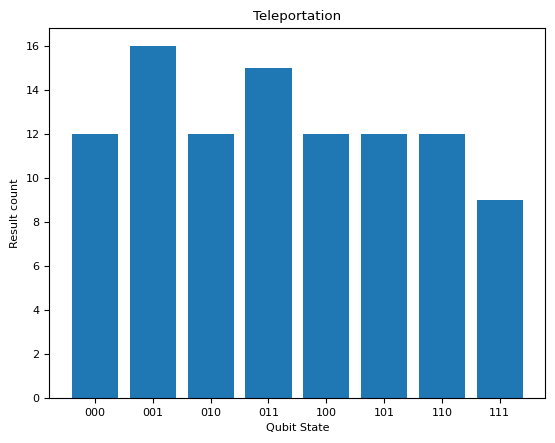

In [ ]:
"""Simulate the teleportation circuit and get the final state of Bob's qubit."""
# Get a simulator.
sim = cirq.Simulator()

# Simulate the teleportation circuit.
result = sim.run(circuit, repetitions=100)

_ = cirq.plot_state_histogram(result, plt.subplot(), title = 'Teleportation', xlabel = 'Qubit State', ylabel = 'Result count', tick_label=binary_labels(3))
plt.show()

<a name="p2"></a>

---
## **Part 2: Entanglement Swapping**
---
In this part, you will perform entanglement swapping.

#### **Step #1: Initialize Four Qubits**

**Together**, create four qubits.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [25]:
qubits = cirq.NamedQubit.range(4, prefix="q")

#### **Step #2: Create Bell Pairs**

**Together**, create a bell pair between `qubit[0]` and `qubit[1]` and between `qubit[2]` and `qubit[3]`.

In [ ]:
circuit = cirq.Circuit()

# Create Bell Pair with 0 and 1
# COMPLETE THIS CODE


# Create Bell Pair with 2 and 3
# COMPLETE THIS CODE

##### **Solution**

In [69]:
circuit = cirq.Circuit()

# Create Bell Pair with 0 and 1
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))


# Create Bell Pair with 2 and 3
circuit.append(cirq.H(qubits[2]))
circuit.append(cirq.CNOT(qubits[2], qubits[3]))

#### **Alice and Bob each send half of their Bell Pairs to the Repeater**

Although there is nothing to implement here, we will now use the qubits as follows:
* $q_0$: Alice's qubit
* $q_1$: Repeater's qubit from Alice
* $q_2$: Repeater's qubit from Bob
* $q_3$: Bob's qubit

#### **Step #3: Quantum Teleportation**

**Together**, let's perform teleportation such that:

* The Repeater's qubit from Alice is the qubit *to be teleported*.
* The Repeater's qubit from Bob is the Repeater's half of its entangled pair with Bob.
* Bob's qubit is the qubit to *receive the teleported state*.

<br>

In practice this means,


* The Repeater:
> * Entangles `qubits[1]` and `qubits[2]` in a standard Bell pair.
> * Measures `qubits[1]` and `qubits[2]` and sends the results to Alice and Bob respectively.

* Alice:
> * Applies a Z gate to `qubits[0]` only if `qubits[1]` is in the 1 state.
> * Measures `qubits[0]`.

* Bob:
> * Applies an X gate to `qubits[3]` only if `qubits[2]` is in the 1 state.
> * Measures `qubits[3]`.


<br>

Display your circuit in the end.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [70]:
circuit.append(cirq.CNOT(qubits[1], qubits[2]))
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.measure(qubits[1], qubits[2]))

circuit.append(cirq.CZ(qubits[1], qubits[0]))
circuit.append(cirq.measure(qubits[0]))

circuit.append(cirq.CNOT(qubits[2], qubits[3]))
circuit.append(cirq.measure(qubits[3]))

circuit

q0: ───H───@───────────────@───M───
           │               │
q1: ───────X───@───H───M───@───────
               │       │
q2: ───H───@───X───────M───@───────
           │               │
q3: ───────X───────────────X───M───

####**Problem #2.1**
**Independently**, simulate the results of the entanglement swapping circuit 1,000 times.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [71]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

####**Problem #2.2**
**Independently**, plot the results of the entanglement swapping circuit. Keep in mind that we have 4 measured qubits total when calling the `binary_labels` function.

<br>

**NOTE**: We have measurement results for all 4 qubits involved in the protocol, but what we are really looking for is entanglement between Alice's and Bob's personal qubits, $q_0$ and $q_3$ respectively. As such, focus on the measurements of the outer qubits (e.g. $|\mathbf{1}01\mathbf{1}\rangle$. You can also run the code provided below using `result.multi_measurement_histogram(...)` to look at the count of outcomes for just these qubits.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
result.multi_measurement_histogram(keys = ['q0', 'q3'])

##### **Solution**

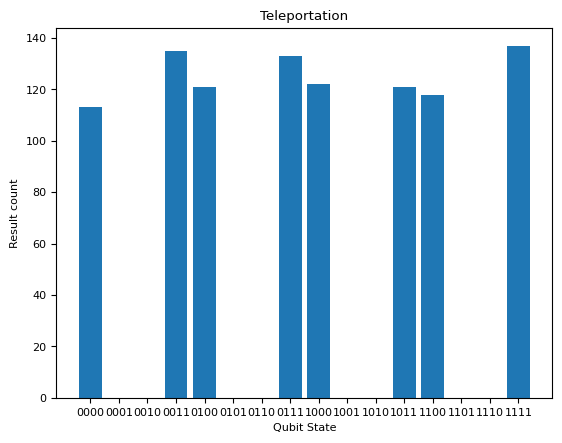

In [72]:
_ = cirq.plot_state_histogram(result, plt.subplot(), title = 'Teleportation', xlabel = 'Qubit State', ylabel = 'Result count', tick_label=binary_labels(4))
plt.show()

In [73]:
result.multi_measurement_histogram(keys = ['q0', 'q3'])

Counter({(0, 0): 474, (1, 1): 526})

### **Key Takeaway**
Alice and Bob's qubits are clearly entangled, *even though they NEVER came in contact*.

Specifically, there was no CX or other gate that ever related the two qubits and Alice and Bob didn't even communicate classically. The only communication was between Alice and the Repeater and then separately the Repeater and Bob. Therefore, Alice and Bob can be as far away from each other as they need so long as they can still reliably reach the Repeater.

<br>

### **Followup Activities**

Consider attempting the following to further hone your understanding of Entanglement Swapping:

* Simulate the results of measuring Alice's and Bob's qubits before Step #3. This should show that until the Repeater gets involved, these qubits were completely unrelated.

* Alter both Alice's and Bob's entangled qubits to be in a different Bell state: $|\beta_{01}\rangle$, $|\beta_{10}\rangle$, or $|\beta_{11}\rangle$. Should the end result change? Does it?

* Alter just one of Alice's or Bob's entangled qubits to be in a different Bell state: $|\beta_{01}\rangle$, $|\beta_{10}\rangle$, or $|\beta_{11}\rangle$. Should the end result change? Does it?

* Add onto this circuit so that Alice uses these shared qubits to teleport a state of your choice to Bob.

* Expand the Entanglement Swapping code to work for 2 or even more repeaters in between Alice and Bob.

<br>

**NOTE**: The easiest way to make these or any other adjustments is to combine the code from each part into one big cell so that you can quickly make an adjustment, run the cell, and interpret the results.

# End of Lab

---

© 2024 The Coding School, All rights reserved